In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [71]:
def cluster_creation(lat,gr,ne,T):
    k=gr.copy()
    cl=[]
    tr=1-np.exp(-1./T)
    for i,gi in enumerate(gr):
        
        if (gi in k) and i!=0:
            cl.append(l.copy())
            l.clear()
            l.append(gi)
            k.remove(gi)
            
        if (gi in k) and i==0:
            l=[]
            l.append(gi)
            k.remove(gi)
            
        for n in ne[i]:
            tri=np.random.uniform(0,1)
            
            if lat[n]==lat[gi]:
                if n in k: 
                    if tri<tr:
                        l.append(n)
                        k.remove(n)
            
    #Add the last one        
    cl.append(l.copy())
    return cl.copy()

In [88]:
L=16
lat=2*np.random.randint(2,size=(L,L))-1
G=nx.grid_2d_graph(L,L,periodic=True)
gr=list(G.nodes())
ne=[]
for g in gr:
    ne.append(list(G.neighbors(g)))

In [89]:
cl=cluster_creation(lat.copy(),gr,ne,2)
gl=cluster_creation(lat.copy(),gr,ne,2)
for c,g in zip(cl,gl):
    print(c,g)

[(0, 0), (1, 0), (15, 0)] [(0, 0)]
[(0, 1)] [(0, 1)]
[(0, 2), (15, 2)] [(0, 2), (1, 2), (15, 2)]
[(0, 3), (15, 3)] [(0, 3), (1, 3)]
[(0, 4)] [(0, 4)]
[(0, 5), (0, 6)] [(0, 5), (0, 6)]
[(0, 7)] [(0, 7)]
[(0, 8)] [(0, 8)]
[(0, 9)] [(0, 9), (15, 9)]
[(0, 10), (15, 10)] [(0, 10), (0, 11)]
[(0, 11)] [(0, 12)]
[(0, 12)] [(0, 13)]
[(0, 13)] [(0, 14)]
[(0, 14), (15, 14)] [(0, 15)]
[(0, 15), (1, 15)] [(1, 0)]
[(1, 1)] [(1, 1)]
[(1, 2), (2, 2)] [(1, 4)]
[(1, 3)] [(1, 5)]
[(1, 4), (2, 4)] [(1, 6)]
[(1, 5)] [(1, 7)]
[(1, 6)] [(1, 8), (2, 8), (1, 9), (2, 9)]
[(1, 7)] [(1, 10)]
[(1, 8), (1, 9), (2, 9)] [(1, 11)]
[(1, 10)] [(1, 12)]
[(1, 11)] [(1, 13)]
[(1, 12)] [(1, 14), (1, 15), (2, 15)]
[(1, 13), (2, 13)] [(2, 0)]
[(1, 14)] [(2, 1)]
[(2, 0)] [(2, 2)]
[(2, 1)] [(2, 3)]
[(2, 3)] [(2, 4)]
[(2, 5)] [(2, 5)]
[(2, 6)] [(2, 6)]
[(2, 7)] [(2, 7)]
[(2, 8)] [(2, 10)]
[(2, 10)] [(2, 11)]
[(2, 11)] [(2, 12)]
[(2, 12)] [(2, 13)]
[(2, 14), (3, 14)] [(2, 14), (3, 15)]
[(2, 15), (3, 15)] [(3, 0), (4, 0)]
[(3, 0)]

In [90]:
#energy definition
#takes a list of the sites for wich you want to evaluate the energy

def en(lat,gr,ne):
    k=gr.copy()
    e=0.
    for i,gi in enumerate(gr):
        for n in ne[i]:
            if n in k:
                e-=lat[gi]*lat[n]
        k.remove(gi) #avoid counting twice
    return(e)

In [91]:
#It is the same of the energy evaluated by hand

lat=2*np.random.randint(2,size=(L,L))-1
G=nx.grid_2d_graph(L,L,periodic=True)
gr=list(G.nodes())
ne=[]

for g in gr:
    ne.append(list(G.neighbors(g)))
e=0.
for i in range(L):
    for j in range(L):
        e-=lat[i][j]*lat[(1+i+L)%L][j]
        e-=lat[i][j]*lat[i][(j+1+L)%L]
        
print(e,en(lat,gr,ne))

44.0 44.0


In [92]:
#change configuration, monte carlo step

def try_change(cl,lat,gr,ne):
    
    if np.random.random()<0.5:
        lat2=lat.copy()
        r=np.random.randint(len(cl))
        s=2*np.random.randint(2)-1
        for c in cl[r]:
            lat2[c]*=s
        return lat2.copy()
    
    else:
        return lat.copy()

In [93]:
#Function that does the simulation
# Need do fix temperature, duration of the simulation.
#You can also set the length of the lattice and give back the trajectory

def simu(T,Te,traj=False,L=16):
    lat=2*np.random.randint(2,size=(L,L))-1
    lat=lat.astype(float)
    
    #Creation of the topology: nodes and neighbors
    G=nx.grid_2d_graph(L,L,periodic=True)
    Gr=list(G.nodes())
    Ne=[]
    
    for g in Gr:
        Ne.append(list(G.neighbors(g)))
        
    m=[]
    e=[]
    e.append(en(lat,Gr,Ne)/L/L)
    m.append((np.sum(lat)/L/L))
    tp=300
    
    for t in range(1,Te+300):
        

        cl=cluster_creation(lat,gr,ne,T)
        lat=try_change(cl,lat,gr,ne)

        if t>tp: #times in log scale
            e.append(float(en(lat,gr,ne)/L/L))
            m.append((float(np.sum(lat))/L/L))
            tp=int(tp*1.1)+1

    e=np.asarray(e)
    m=np.asarray(m)
    
    if traj:
        
        return e, m
    
    else:
        return np.mean(e),np.var(e),np.mean(m),np.var(m)

In [79]:
e,m=simu(3.7,3000,True,20)

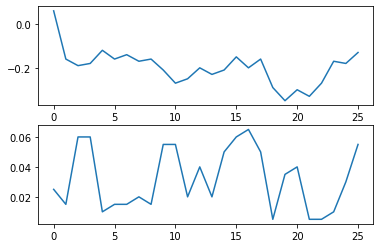

In [80]:
fig=plt.figure()
ax1=fig.add_subplot(2.7,1,1)
ax2=fig.add_subplot(2.7,1,2)
ax1.plot(e)
ax2.plot(abs(m))

In [81]:
#temporal behavior of the energy and the magnetization
e_m=[]
m_m=[]
for i in range(1,e.shape[-1]):
    e_m.append(np.mean(e[:i]))
    m_m.append((np.mean(m[:i])))
e_m=np.asarray(e_m)
m_m=np.asarray(m_m)

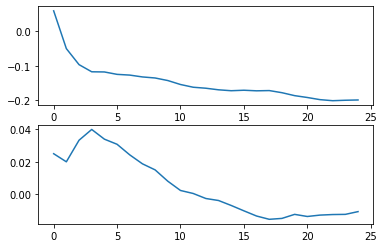

In [82]:
fig=plt.figure()
ax1=fig.add_subplot(2.7,1,1)
ax2=fig.add_subplot(2.7,1,2)
ax1.plot(e_m)
ax2.plot((m_m))

In [94]:

Te=100
Tem=np.linspace(0.7,3.7,num=100,endpoint=True)
Tem=Tem.astype(float)
results=[]
for T in Tem:
    results.append(simu(T,Te))

In [95]:
results=np.asarray(results)

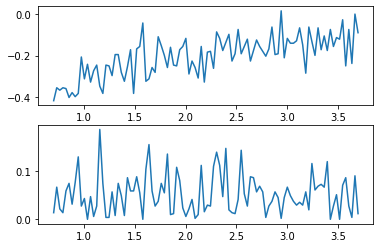

In [96]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax1.plot(Tem,results[:,0])
ax2=fig.add_subplot(2,1,2)
ax2.plot(Tem,abs(results[:,2]))

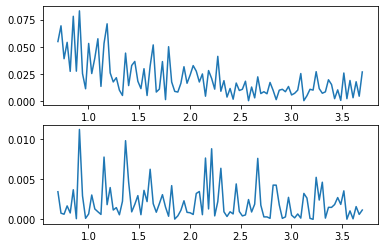

In [97]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax1.plot(Tem,results[:,1])
ax2=fig.add_subplot(2,1,2)
ax2.plot(Tem,results[:,3])

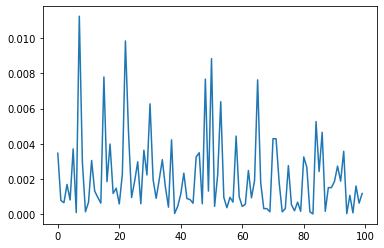

In [98]:
plt.plot(results[:,3])

In [2]:
#Ising model using a 1d array
L=16
g=2*np.random.randint(2,size=L*L)-1
g

array([-1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1

In [3]:
#List of neighbors
def neig(i,L):
    l=[]
    l.append((i+1+L)%(L)+i//(L)*L)
    l.append((i-1+L)%(L)+i//(L)*L)
    l.append((i+L)%(L*L))
    l.append((i-L)%(L*L))
    return l.copy()

In [5]:
nei=[]
for i in range(g.shape[0]):
    nei.append(neig(i,L))
nei=np.asarray(nei)
print(nei)

[[  1  15  16 240]
 [  2   0  17 241]
 [  3   1  18 242]
 ...
 [254 252  13 237]
 [255 253  14 238]
 [240 254  15 239]]


In [ ]:
k=list(range(g.shape[0]))
cl=[]
T=2.7
tr=np.exp(-2.*T)

for i in range(g.shape[0]):
    
    if i in k and i==0:
        l=[]
        l.append(i)
        k.remove(i)
        
    if i in k and i!=0:
        cl.append(l.copy())
        l.clear()
        l.append(i)
        k.remove(i)
        
    for n in nei[i]:
        if n in k and g[i]==g[n] and np.random.uniform(0,1)<tr:
            l.append(n)
            k.remove(n)
cl.append(l)
cl

In [9]:
m=float(sum(g))/g.shape[0]

In [12]:
if np.random.uniform(0,1)<0.5:
    r=np.random.randint(0,len(cl))
    for c in cl[r]:
        g[c]*=-1
g

array([-1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1

In [134]:
def cluster_creation_1(T,L,g):
    tr=1-np.exp(-2./T)
    k=list(range(L*L))
    cl=[]
    
    for i in range(L*L):
    
        if i in k and i==0:
            l.append(i)
            k.remove(i)

        if i in k and i!=0:
            cl.append(l.copy())
            l.clear()
            l.append(i)
            k.remove(i)

        for n in nei[i]:
            if n in k and g[i]==g[n] and np.random.random()<tr:
                l.append(n)
                k.remove(n)
                
    cl.append(l.copy())
    l.clear()
    return cl.copy()

In [135]:
L=16
g=2*np.random.randint(2,size=L*L)-1
T=float(1.27)
m=[]
nei=[]
m_m=[]
m.append(float(sum(g)/L/L))
m_m.append(m[-1])
tp_p=[0]
for i in range(g.shape[0]):
    nei.append(neig(i,L))
nei=np.asarray(nei)
tp=0
cl=[]
k=[]
l=[]
for t in range(300):
    cl=cluster_creation_1(T,L,g)
    
    if np.random.random()<0.5:
        r=np.random.randint(0,len(cl))
        g[cl[r]]*=-1
        
    if t>tp:
        m.append(float(sum(g))/g.shape[0])
        m_m.append(sum(m))
        tp=int(tp*1.1)+1
        tp_p.append(tp)

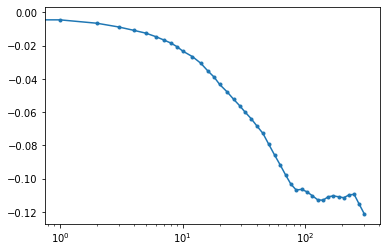

In [136]:
m=np.asarray(m)
m_m=np.asarray(m_m)/len(m_m)
#plt.plot(abs(m_m))
plt.plot(tp_p,(m_m),'.-')
plt.xscale('log')

In [143]:
L=12
g=2*np.random.randint(2,size=L*L)-1
m_m=[]
nei=[]
for i in range(g.shape[0]):
    nei.append(neig(i,L))
nei=np.asarray(nei)
cl=[]
Te=np.linspace(0.01,3,50)

for T in Te:
    m=[]

    m.append(float(sum(g)/L/L))

    tp=0
    l=[]
    for t in range(500):
        cl.clear()
        cl=cluster_creation_1(T,L,g)

        if np.random.random()<0.5:
            r=np.random.randint(0,len(cl))
            g[cl[r]]*=-1

        if t>tp:
            m.append(float(sum(g))/L/L)
            tp=int(tp*1.1)+1
    m=np.asarray(m)
    m_m.append([abs(m).mean(),m.var()])
    
m_m=np.asarray(m_m)

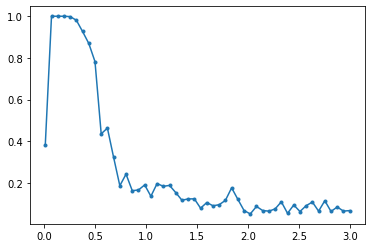

In [144]:
plt.plot(Te,m_m[:,0],'.-')